# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     1158.
Date:                Sun, 07 May 2023   Prob (F-statistic):           2.55e-43
Time:                        10:53:43   Log-Likelihood:                 6.4450
No. Observations:                  50   AIC:                            -4.890
Df Residuals:                      46   BIC:                             2.758
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0054      0.076     66.222      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.47783928  4.98461244  5.44885902  5.8409159   6.14182522  6.34644911
  6.46431382  6.51804461  6.53964846  6.56525541  6.62918252  6.75829566
  6.96759551  7.25775303  7.61499918  8.01338716  8.41905538  8.79579085
  9.11097884  9.34096141  9.47492432  9.51667381  9.48401122  9.4058083
  9.31726363  9.25411964  9.24679019  9.31536368  9.46630257  9.69138164
  9.96903934 10.2679203  10.55202694 10.78663376 10.94399267 11.00789185
 10.97631941 10.86179383 10.6893073  10.49221951 10.30677679 10.16615692
 10.0950181  10.10544772 10.19497639 10.34698369 10.53342884 10.71945772
 10.86912931 10.95132069]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[10.93007625 10.76544198 10.47876272 10.11868071  9.74922622  9.43414074
  9.22127084  9.13085365  9.1505621   9.23852302]


## Plot comparison

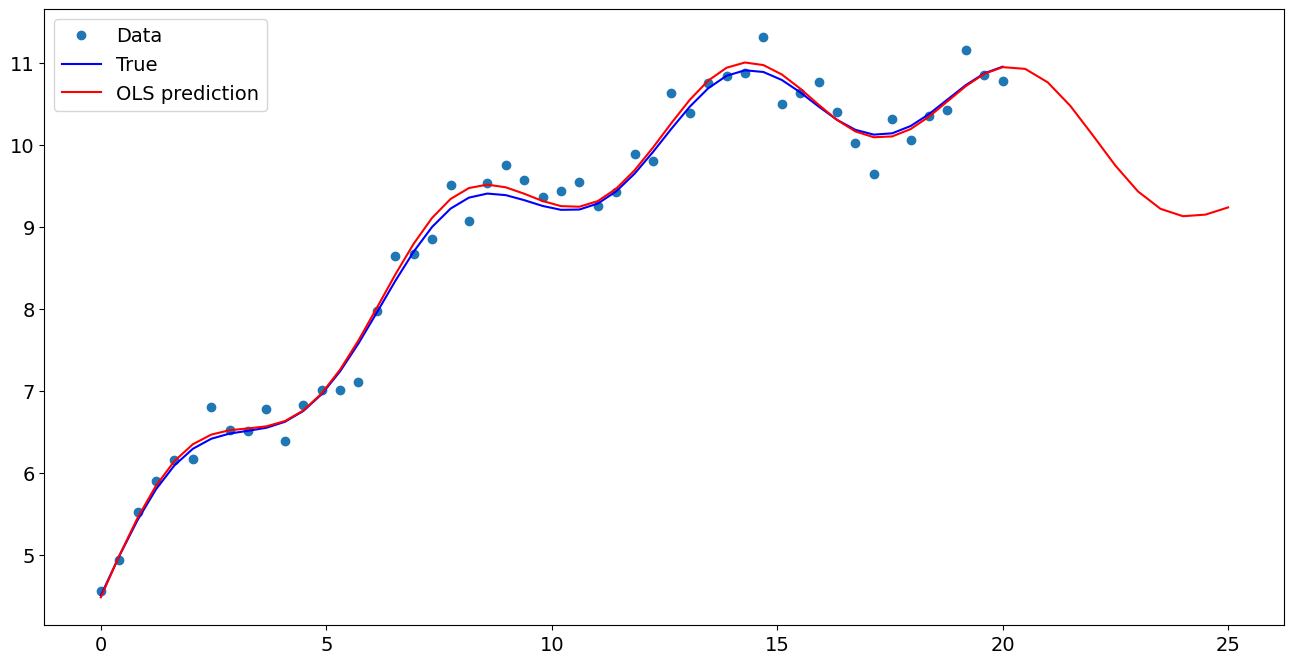

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           5.005440
x1                  0.509869
np.sin(x1)          0.544286
I((x1 - 5) ** 2)   -0.021104
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    10.930076
1    10.765442
2    10.478763
3    10.118681
4     9.749226
5     9.434141
6     9.221271
7     9.130854
8     9.150562
9     9.238523
dtype: float64